(0.0, 101936.26089545265)

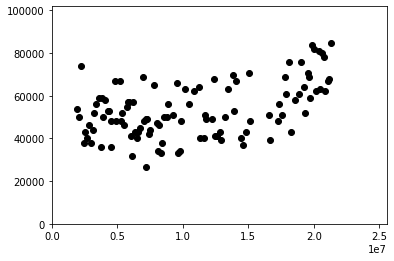

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("data/baby1.json") as datafile:
  data = json.load(datafile)

time_msec = []
contraction_length_msec = []
for entry in data["contractions"]:
    time_msec.append(entry["startTime"])
    contraction_length_msec.append(entry["duration"])

time_msec = np.array(time_msec)
contraction_length_msec = np.array(contraction_length_msec)
indexes = time_msec.argsort()
time_msec = time_msec[indexes]
contraction_length_msec = contraction_length_msec[indexes]


plt.plot(time_msec, contraction_length_msec, 'o', color='black')
plt.xlim([0, max(time_msec)*1.2])
plt.ylim([0, max(contraction_length_msec)*1.2])

(0.0, 101936.26089545265)

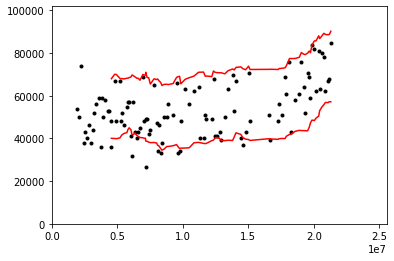

In [27]:

WINDOW_SIZE = 20

means = []
standard_devs = []
mean_upper = []
mean_lower = []
for i in range(WINDOW_SIZE-1, len(contraction_length_msec)):
    contraction_sub_array = contraction_length_msec[i-WINDOW_SIZE+1:i+1]
    mean = np.mean(contraction_sub_array)
    standard_dev = np.std(contraction_sub_array)
    means.append(mean)
    standard_devs.append(standard_dev)
    mean_upper.append(mean+2*standard_dev)
    mean_lower.append(mean+2-standard_dev)

plt.plot(time_msec, contraction_length_msec, '.', color='black')
plt.plot(time_msec[WINDOW_SIZE-1:len(contraction_length_msec)], mean_upper, '-', color='red')
plt.plot(time_msec[WINDOW_SIZE-1:len(contraction_length_msec)], mean_lower, '-', color='red')
plt.xlim([0, max(time_msec)*1.2])
plt.ylim([0, max(contraction_length_msec)*1.2])

